In [2]:
import pandas as pd
import numpy as np

In [156]:
#################################################
# 0) FUNCTIONS                                  #
#################################################

In [3]:
import sys
sys.path.append('../')
from func import *

#DEFINED FUNCTIONS :
    
#unique_clean(data,col,pr=0)

#df_with_text(data,col,text)
#text_in_df(data,col,text)
#two_text_in_df(data,col,text1,text2)
#two_text_in_df(data,col,text1,text2='')

#values_U_not_nan(data,col_name)
#not_nan_get_values(data,col_name,pr=0)
#not_nan_get_index(data, col_name, pr=0)
#nan_get_index(data, col_name, pr=0)

#is_not_decimal(a)
#is_not_13(a)
#split_text_left(text_to_split,text)
#split_item_left(st)
#split_item_right(st)

#find_weight(text):     #s = re.compile('\d+G') extracts '210G'

In [158]:

##########################################
# 1) IMPORT DATA
##########################################


In [6]:

####################################################################################
# 1.1) IMPORT M_PROD_MFINAL (merge Nielsen and Openfood facts)

prod=pd.read_csv('../M_MERGE/output_data/M_PROD_FINAL.csv',index_col=0)
prod['O_EAN13'] = prod['O_EAN13'].astype(str)
prod['N_EAN13'] = prod['N_EAN13'].astype(str)
print('-'*50,'\nPRODUCTS\n','-'*50)
print('\nproduct shape:',prod.shape,'\n')
print('\n',prod.info())

-------------------------------------------------- 
PRODUCTS
 --------------------------------------------------

product shape: (3979, 74) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3979 entries, 0 to 3978
Data columns (total 74 columns):
O_EAN13                                                    3979 non-null object
O_product_name_fr                                          3305 non-null object
O_product_name                                             3419 non-null object
O_brands                                                   3434 non-null object
O_brands_tags_str                                          3434 non-null object
O_brands_tags                                              3434 non-null object
O_serving_size                                             539 non-null object
O_serving_quantity                                         539 non-null float64
O_countries_hierarchy                                      3434 non-null object
O_cities_tags                   

In [8]:

####################################################################################
# 1.2) IMPORT INGREDIENTS (extracted form products in M_PROD_MFINAL)

ing=pd.read_csv('../O_OPENFF/output_data/O_ingredients.csv', index_col=0)
ing['O_EAN13'] = ing['O_EAN13'].astype(str)
ing['id_language']=ing['id_ingredient'].apply(lambda text: text[0:2])
print('-'*50,'\nINGREDIENTS\n','-'*50)
print('\ningredient shape:',ing.shape,'\n')
print('\n',ing.info())

-------------------------------------------------- 
INGREDIENTS
 --------------------------------------------------

ingredient shape: (39114, 12) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39114 entries, 0 to 39113
Data columns (total 12 columns):
O_EAN13                39114 non-null object
id_ingredient          39114 non-null object
has_sub_ingredients    5631 non-null object
sub_ingredients        4888 non-null object
text                   39114 non-null object
percent_min            28684 non-null float64
percent_max            28684 non-null float64
percent                6188 non-null float64
rank                   27771 non-null float64
product_name_fr        38105 non-null object
unknown_ingredient     39114 non-null int64
id_language            39114 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 3.9+ MB

 None


In [10]:

####################################################################################
# 1.3) import unique EAN13 in Nielsen


N_EAN13_U=pd.read_csv('../N_NIELSEN/output_data/N_EAN13_U.csv',index_col=0,names=['N_EAN13_U'])
N_EAN13_U['N_EAN13_U'] = N_EAN13_U['N_EAN13_U'].astype(str)
print('\n',N_EAN13_U.info())
N_EAN13_U=np.array(N_EAN13_U)
print('-'*50,'\nUNIQUE EAN13 IN NIELSEN\n','-'*50)
print('\nnumber of unique EAN13:',len(N_EAN13_U),'\n')

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1426 entries, nan to 1424.0
Data columns (total 1 columns):
N_EAN13_U    1426 non-null object
dtypes: object(1)
memory usage: 22.3+ KB

 None
-------------------------------------------------- 
UNIQUE EAN13 IN NIELSEN
 --------------------------------------------------

number of unique EAN13: 1426 



In [11]:
print(ing.shape)


(39114, 12)


In [12]:
print(type(ing['O_EAN13'][0]))

<class 'str'>


In [48]:

##########################################
# 2) ANALYSIS OF INGREDIENTS
##########################################


In [13]:
#NUMBER OF UNIQUE INGREDIENTS (ALL)
ing_U=ing['id_ingredient'].unique()
print('total number of ingredients:',len(ing_U))
#print('total number fo ingredients for NIELSEN products (hors MDD):',len(ing_U))

total number of ingredients: 5298


In [14]:
#NUMBER OF UNIQUE INGREDIENTS (NON ENGLISH AND NON FRENCH)
language=['en','fr','it', 'de', 'ru', 'af', 'es', 'pl', 'nl', 'sv']
print('languages for ingredients:\n',language,'\n')

for l in language:
    ing_temp=ing[ing['id_language']==l]
    ing_temp_U=ing_temp['id_ingredient'].unique()
    print(l,':',len(ing_temp_U),'number of unique ingredients identified (',ing_temp.shape[0],'lines)')


languages for ingredients:
 ['en', 'fr', 'it', 'de', 'ru', 'af', 'es', 'pl', 'nl', 'sv'] 

en : 1231 number of unique ingredients identified ( 33641 lines)
fr : 3863 number of unique ingredients identified ( 5228 lines)
it : 93 number of unique ingredients identified ( 106 lines)
de : 60 number of unique ingredients identified ( 69 lines)
ru : 1 number of unique ingredients identified ( 7 lines)
af : 1 number of unique ingredients identified ( 6 lines)
es : 27 number of unique ingredients identified ( 35 lines)
pl : 4 number of unique ingredients identified ( 4 lines)
nl : 10 number of unique ingredients identified ( 10 lines)
sv : 8 number of unique ingredients identified ( 8 lines)


In [15]:
#NUMBER OF UNIQUE INGREDIENTS (ENGLISH)
ing_EN=ing[ing['id_language']=='en']
print('number of line of ingredients in English:',ing_EN.shape[0])
ing_EN_U=ing_EN['id_ingredient'].unique()
print('total number of UNIQUE ingredients identified (:en):',len(ing_EN_U))

number of line of ingredients in English: 33641
total number of UNIQUE ingredients identified (:en): 1231


In [16]:
#NUMBER OF UNIQUE INGREDIENTS (FRENCH)
ing_FR=ing[ing['id_language']=='fr']
print(ing_FR.shape)
ing_FR_U=ing_FR['id_ingredient'].unique()
print('total number of UNIQUE identified (:fr):',len(ing_FR_U))

(5228, 12)
total number of UNIQUE identified (:fr): 3863


In [165]:

##########################################
# 3) ANALYSE OF SUB INGREDIENTS
##########################################


In [17]:
# 2.1) creation of a column concatinating id_ingredient and sub_ingredient 
# !!! nan values if no sub ingredient

ing['id_ing_sub_ing']=ing['id_ingredient'] + ' | ' + ing['sub_ingredients']

In [638]:
# 2.2) split sub_ingredients (if sub ingredient exists) in 3 columns : 
# sub_ingredients_text
# sub_ingredients_en
# sub_ingredients_fr
# (format str but looks like a dictionary)

In [134]:
# creation of dataframe on product with subingredients
not_nan_sub_ing_index=not_nan_get_index(ing, 'sub_ingredients', pr=1)
print(len(not_nan_sub_ing_index))


number of non nan values: 4888 

index of not nan values:

 18       [{'percent': '137', 'text': 'ar extravergine',...
34       [{'text': 'carne suina', 'id': 'it:carne suina...
47                    [{'id': 'en:milk', 'text': 'latte'}]
50       [{'text': '8400kJ', 'id': 'it:8400kJ'}, {'text...
94       [{'percent_min': 0, 'percent_max': '0.8', 'tex...
                               ...                        
39042    [{'percent_min': 0, 'percent_max': 7, 'text': ...
39060    [{'percent_max': '8.5', 'percent_min': 1.21428...
39065    [{'percent_min': 0, 'percent_max': '8.5', 'id'...
39066    [{'percent_max': '8.5', 'percent_min': 0, 'id'...
39070    [{'id': 'en:shrimp', 'text': 'CREVETTES', 'per...
Name: sub_ingredients, Length: 4888, dtype: object
4888


In [135]:
# creaton of column 'sub_ing_dict' + manual correction of some values (',' in text...)

ing['sub_ing_dict']=ing['sub_ingredients'].str.strip()
for l in language:
    ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace(l+":",l+';')

to_change_index=[
    10210,10223,10236, #'ail 0,06'
    16757,        # 'Tomates 46,8'
    17885,        # 'câpres 3,3'
    34251,        # 'Fettsâuren 5,6'
    37050,         # 'persil 0,7'
    31148,          # '30'
    31148,        # 'concentrated, en'
    39070,        # 'fr:'
    ]

print(ing['sub_ingredients'][to_change_index[-1]])

#manual correction
ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace('ail 0,06','ail 0.06')
ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace('Tomates 46,8','Tomates 46.8')
ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace('câpres 3,3','câpres 3.3')
ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace('Fettsâuren 5,6','Fettsâuren 5.6')
ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace('persil 0,7','persil 0.7')
ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace(": '30'",': 30')
ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace('concentrated, en','concentrated; en')
#ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace('','')
#check new value
#print(ing['sub_ing_dict'][to_change_index[-1]])


[{'id': 'en:shrimp', 'text': 'CREVETTES', 'percent_max': 7.545454545454546, 'percent_min': 0}, {'percent_min': 0, 'percent_max': 3.772727272727273, 'text': 'SEL', 'id': 'en:salt'}]


In [136]:
#transform 'sub_ing_dict' (string) into dictionary

def cut_2_left(text):
    if type(text)==str:
        return text[2:]
    else:
        return '__'

ing['sub_ing_dict']=ing['sub_ing_dict'].apply(lambda row: cut_2_left(row))
ing['sub_ing_dict']=ing['sub_ing_dict'].apply(lambda row: row[:-2])

#print(ing['sub_ing_dict'][k])

def text_to_dict(text):
    if isinstance(text,str) :
        text=text.split('}, {')[0]
        if text=='':
            return ''
        else:
            list=text.split(',')
            if len(list)>0:
                for i in range(len(list)):
                    list[i]=list[i].split(':')
                dict={}
                for i in range(len(list)):
                    if isinstance(list[i][1],str):
                        #temp=len(list[i][1])
                        #print(i,':',temp,'(',type(temp),')')
                        if i==0:
                            dict[list[i][0][1:-1]]=list[i][1][2:-1]
                        else:
                            dict[list[i][0][2:-1]]=list[i][1][2:-1]
                    else:
                        if i==0:
                            dict[list[i][0][1:-1]]=list[i][1]
                        else:
                            dict[list[i][0][2:-1]]=list[i][1]
                return dict
            else:
                return ''

    else:
        return ''


#text_to_dict(ing['sub_ing_dict'][n])

for i in not_nan_sub_ing_index:
    k=i
    ing['sub_ing_dict'][i]=text_to_dict(ing['sub_ing_dict'][i])

#print(n,':',type(ing['sub_ing_dict'][k]),'\n',ing['sub_ing_dict'][k])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
#debuggage
n=k
#n=not_nan_sub_ing_index[100]
print(n)
print(ing['sub_ing_dict'][n])
ing['sub_ing_dict'][n]

39070
{'id': 'en;shrimp', 'text': 'CREVETTES', 'percent_max': '.54545454545454', 'percent_min': ''}


{'id': 'en;shrimp',
 'text': 'CREVETTES',
 'percent_max': '.54545454545454',
 'percent_min': ''}

In [138]:
temp=ing.loc[not_nan_sub_ing_index,:]
#temp=ing.loc[not_nan_sub_ing_index,'sub_ingredients']
print('temp shape',temp.shape)
temp

print('values empty =''):',(temp['sub_ing_dict']=='').sum())
print('values not empty):',(temp['sub_ing_dict']!='').sum())

temp shape (4888, 18)
values empty =): 113
values not empty): 4775


In [139]:
# split 'sub_ing_dict' (if sub ingredient exists) in 3 columns : 
# sub_ingredients_text
# sub_ingredients_en
# sub_ingredients_fr
# 

import math

ing['sub_ingredients_id'] = ''
ing['sub_ingredients_fr'] = ''
ing['sub_ingredients_text'] = ''

temp_cfn_id = []
temp_cfn_fr = []
temp_cfn_text = []

j=0
for i in range(len(ing['sub_ing_dict'])) :
    tc=ing['sub_ing_dict'][i]
    if tc!='' :
        j+=1
        #print(tc['id'])
        if 'id' in tc :
            #print(tc['id'])
            temp_cfn_id.append(tc['id'])
        else :
            temp_cfn_id.append('')
        
        if 'fr' in tc :
            temp_cfn_fr.append(tc['fr'])
        else :
            temp_cfn_fr.append('')
        
        if 'text' in tc :
            temp_cfn_text.append(tc['text'])
        else :
            temp_cfn_text.append('')    
    else :
        #print(tc)
        temp_cfn_id.append('')
        temp_cfn_fr.append('')
        temp_cfn_text.append('')
        
ing['sub_ingredients_id'] = temp_cfn_id
ing['sub_ingredients_fr'] = temp_cfn_fr
ing['sub_ingredients_text'] = temp_cfn_text


In [140]:
for l in language:
    #ing['sub_ing_dict']=ing['sub_ing_dict'].str.replace(l+";",l+':')
    ing['sub_ingredients_id']=ing['sub_ingredients_id'].str.replace(l+";",l+':')
    ing['sub_ingredients_fr']=ing['sub_ingredients_fr'].str.replace(l+";",l+':')
    ing['sub_ingredients_text']=ing['sub_ingredients_text'].str.replace(l+";",l+':')

In [141]:
#creation on a column with id_ingredient and sub_ingredient_id (if it exists)
# =>column with no nan values

ing['ing_id_sub_ing_id']=ing['id_ingredient'].copy()
temp = []
for i in not_nan_sub_ing_index:
    #print(ing['id_ingredient'][[i]])
    #temp.append(str(ing['id_ingredient'][i]))
    #temp.append(str(ing['id_ingredient'][i] + ' | ' + ing['sub_ingredients_id'][i]))
    ing['ing_id_sub_ing_id'][i]=str(ing['id_ingredient'][i] + ' | ' + ing['sub_ingredients_id'][i])

# !!!!!!!!!!!!!!!!!!!
# la colonne 'ing_id_sub_ing_id 'ne se créée pas correctement (manque sub_ingredient_id)
# !!!!!!!!!!!!!!!!!!!!!!!!

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [142]:
#create a dataframe of subingredients (not nan)
print('ing :',ing.shape)
df_ING_with_sub=ing.loc[not_nan_sub_ing_index]
print('df_sub_ing_not_nan',df_ING_with_sub.shape)

ing : (39114, 18)
df_sub_ing_not_nan (4888, 18)


In [143]:
df_ING_with_sub

,O_EAN13,id_ingredient,has_sub_ingredients,sub_ingredients,text,percent_min,percent_max,percent,rank,product_name_fr,unknown_ingredient,id_language,id_ing_sub_ing,sub_ing_dict,sub_ingredients_id,sub_ingredients_fr,sub_ingredients_text,ing_id_sub_ing_id
18,12120222,fr:pol remo r,yes,"[{'percent': '137', 'text': 'ar extravergine',...",pol remo r,NaN,NaN,NaN,5.0,Alla Bolognese,1,fr,"fr:pol remo r | [{'percent': '137', 'text': 'a...","{'percent': '137', 'text': 'ar extravergine', ...",fr:ar extravergine,,ar extravergine,fr:pol remo r | fr:ar extravergine
34,17863056,it:salsiccia,yes,"[{'text': 'carne suina', 'id': 'it:carne suina...",salsiccia,NaN,NaN,10.0,4.0,NaN,1,it,"it:salsiccia | [{'text': 'carne suina', 'id': ...","{'text': 'carne suina', 'id': 'it;carne suina'}",it:carne suina,,carne suina,it:salsiccia | it:carne suina
47,17863056,it:Può contenere tracce di,yes,"[{'id': 'en:milk', 'text': 'latte'}]",Può contenere tracce di,NaN,NaN,NaN,17.0,NaN,1,it,it:Può contenere tracce di | [{'id': 'en:milk'...,"{'id': 'en;milk', 'text': 'latte'}",en:milk,,latte,it:Può contenere tracce di | en:milk
50,17863056,it:delle Assunzioni di riferimento di un adult...,yes,"[{'text': '8400kJ', 'id': 'it:8400kJ'}, {'text...",delle Assunzioni di riferimento di un adulto m...,NaN,NaN,NaN,20.0,NaN,1,it,it:delle Assunzioni di riferimento di un adult...,"{'text': '8400kJ', 'id': 'it;8400kJ'}",it:8400kJ,,8400kJ,it:delle Assunzioni di riferimento di un adult...
94,2000000064035,en:acidity-regulator,yes,"[{'percent_min': 0, 'percent_max': '0.8', 'tex...",Correttore di acidità,0.0,0.800000,NaN,11.0,NaN,0,en,"en:acidity-regulator | [{'percent_min': 0, 'pe...","{'percent_min': '', 'percent_max': '0.8', 'tex...",en:e270,,acido lattico,en:acidity-regulator | en:e270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39042,9556041611152,en:colour,yes,"[{'percent_min': 0, 'percent_max': 7, 'text': ...",COLORANT,0.0,7.000000,NaN,8.0,Sauce Teriyaki Ayam™,0,en,"en:colour | [{'percent_min': 0, 'percent_max':...","{'percent_min': '', 'percent_max': '', 'text':...",fr:150D,,150D,en:colour | fr:150D
39060,9556041611978,fr:SAUCE SOJA EPAISSE,yes,"[{'percent_max': '8.5', 'percent_min': 1.21428...",SAUCE SOJA EPAISSE,8.5,8.500000,8.5,3.0,Mi Goreng Sauce Wok,1,fr,fr:SAUCE SOJA EPAISSE | [{'percent_max': '8.5'...,"{'percent_max': '8.5', 'percent_min': '.214285...",en:sugar,,SUCRE,fr:SAUCE SOJA EPAISSE | en:sugar
39065,9556041611978,en:thickener,yes,"[{'percent_min': 0, 'percent_max': '8.5', 'id'...",EPAISSISSANTS,0.0,8.500000,NaN,8.0,Mi Goreng Sauce Wok,0,en,"en:thickener | [{'percent_min': 0, 'percent_ma...","{'percent_min': '', 'percent_max': '8.5', 'id'...",en:e1422,,e1422,en:thickener | en:e1422
39066,9556041611978,en:curry-powder,yes,"[{'percent_max': '8.5', 'percent_min': 0, 'id'...",POUDRE DE CURRY,0.0,8.500000,NaN,9.0,Mi Goreng Sauce Wok,0,en,"en:curry-powder | [{'percent_max': '8.5', 'per...","{'percent_max': '8.5', 'percent_min': '', 'id'...",en:chili-pepper,,PIMENT,en:curry-powder | en:chili-pepper


In [144]:
df_ING_with_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 18 to 39070
Data columns (total 18 columns):
O_EAN13                 4888 non-null object
id_ingredient           4888 non-null object
has_sub_ingredients     4888 non-null object
sub_ingredients         4888 non-null object
text                    4888 non-null object
percent_min             3430 non-null float64
percent_max             3430 non-null float64
percent                 1185 non-null float64
rank                    4888 non-null float64
product_name_fr         4778 non-null object
unknown_ingredient      4888 non-null int64
id_language             4888 non-null object
id_ing_sub_ing          4888 non-null object
sub_ing_dict            4888 non-null object
sub_ingredients_id      4888 non-null object
sub_ingredients_fr      4888 non-null object
sub_ingredients_text    4888 non-null object
ing_id_sub_ing_id       4888 non-null object
dtypes: float64(4), int64(1), object(13)
memory usage: 725.6+ KB


In [145]:
# ANALYSE DES SUB-INGREDIENTS

sub_ing_U=ing[['sub_ingredients_id', 'sub_ingredients', 'O_EAN13']].groupby(by=['sub_ingredients_id', 'sub_ingredients']).count().sort_values(by='O_EAN13',ascending=False)
print(len(sub_ing_U))
sub_ing_U.head(10)

4352


,,O_EAN13
sub_ingredients_id,sub_ingredients,
,[],113
en:e330,"[{'text': 'acide citrique', 'id': 'en:e330'}]",25
en:e270,"[{'id': 'en:e270', 'text': 'acide lactique'}]",19
en:water,"[{'text': 'eau', 'id': 'en:water'}]",18
en:e270,"[{'text': 'acide lactique', 'id': 'en:e270'}]",12
en:water,"[{'id': 'en:water', 'text': 'eau'}]",12
en:e202,"[{'id': 'en:e202', 'text': 'sorbate de potassium'}]",12
en:e415,"[{'id': 'en:e415', 'text': 'gomme xanthane'}]",11
en:e330,"[{'id': 'en:e330', 'text': 'acide citrique'}]",11


In [146]:
ing.head()

,O_EAN13,id_ingredient,has_sub_ingredients,sub_ingredients,text,percent_min,percent_max,percent,rank,product_name_fr,unknown_ingredient,id_language,id_ing_sub_ing,sub_ing_dict,sub_ingredients_id,sub_ingredients_fr,sub_ingredients_text,ing_id_sub_ing_id
0,10127780,fr:coulis-de-tomates,NaN,NaN,Coulis de Tomate,78.900,78.900,78.9,1.0,sauce tomate et aubergines grillées,1,fr,NaN,,,,,fr:coulis-de-tomates
1,10127780,en:aubergine,NaN,NaN,aubergines,9.700,9.700,9.7,2.0,sauce tomate et aubergines grillées,0,en,NaN,,,,,en:aubergine
2,10127780,en:extra-virgin-olive-oil,NaN,NaN,huile extra-vierge d'olive,3.900,3.900,3.9,3.0,sauce tomate et aubergines grillées,0,en,NaN,,,,,en:extra-virgin-olive-oil
3,10127780,en:onion,NaN,NaN,oignons,1.875,3.900,NaN,4.0,sauce tomate et aubergines grillées,0,en,NaN,,,,,en:onion
4,10127780,en:carrot,NaN,NaN,carottes,1.200,3.175,NaN,5.0,sauce tomate et aubergines grillées,0,en,NaN,,,,,en:carrot


In [147]:
# INGREDIENTS WITH SUB-INGREDIENTS

df_ING_with_sub=ing[ing['has_sub_ingredients']=='yes']
print('number fo sub ingredients in ingredients database:',df_ING_with_sub.shape[0])
print(type(df_ING_with_sub))
df_ING_with_sub.columns

number fo sub ingredients in ingredients database: 5631
<class 'pandas.core.frame.DataFrame'>


Index(['O_EAN13', 'id_ingredient', 'has_sub_ingredients', 'sub_ingredients',
       'text', 'percent_min', 'percent_max', 'percent', 'rank',
       'product_name_fr', 'unknown_ingredient', 'id_language',
       'id_ing_sub_ing', 'sub_ing_dict', 'sub_ingredients_id',
       'sub_ingredients_fr', 'sub_ingredients_text', 'ing_id_sub_ing_id'],
      dtype='object')

In [148]:
#print(type(ing_with_sub))
df_ING_with_sub.head()

,O_EAN13,id_ingredient,has_sub_ingredients,sub_ingredients,text,percent_min,percent_max,percent,rank,product_name_fr,unknown_ingredient,id_language,id_ing_sub_ing,sub_ing_dict,sub_ingredients_id,sub_ingredients_fr,sub_ingredients_text,ing_id_sub_ing_id
18,12120222,fr:pol remo r,yes,"[{'percent': '137', 'text': 'ar extravergine',...",pol remo r,NaN,NaN,NaN,5.0,Alla Bolognese,1,fr,"fr:pol remo r | [{'percent': '137', 'text': 'a...","{'percent': '137', 'text': 'ar extravergine', ...",fr:ar extravergine,,ar extravergine,fr:pol remo r | fr:ar extravergine
34,17863056,it:salsiccia,yes,"[{'text': 'carne suina', 'id': 'it:carne suina...",salsiccia,NaN,NaN,10.0,4.0,NaN,1,it,"it:salsiccia | [{'text': 'carne suina', 'id': ...","{'text': 'carne suina', 'id': 'it;carne suina'}",it:carne suina,,carne suina,it:salsiccia | it:carne suina
47,17863056,it:Può contenere tracce di,yes,"[{'id': 'en:milk', 'text': 'latte'}]",Può contenere tracce di,NaN,NaN,NaN,17.0,NaN,1,it,it:Può contenere tracce di | [{'id': 'en:milk'...,"{'id': 'en;milk', 'text': 'latte'}",en:milk,,latte,it:Può contenere tracce di | en:milk
50,17863056,it:delle Assunzioni di riferimento di un adult...,yes,"[{'text': '8400kJ', 'id': 'it:8400kJ'}, {'text...",delle Assunzioni di riferimento di un adulto m...,NaN,NaN,NaN,20.0,NaN,1,it,it:delle Assunzioni di riferimento di un adult...,"{'text': '8400kJ', 'id': 'it;8400kJ'}",it:8400kJ,,8400kJ,it:delle Assunzioni di riferimento di un adult...
94,2000000064035,en:acidity-regulator,yes,"[{'percent_min': 0, 'percent_max': '0.8', 'tex...",Correttore di acidità,0.0,0.8,NaN,11.0,NaN,0,en,"en:acidity-regulator | [{'percent_min': 0, 'pe...","{'percent_min': '', 'percent_max': '0.8', 'tex...",en:e270,,acido lattico,en:acidity-regulator | en:e270


In [149]:
# CATEGORIES OF SUB-INGREDIENTS
ing_with_sub_by_id_U = df_ING_with_sub['id_ingredient'].unique()
print('\nnumber of categories (id_ingredients) of sub-ingredients:',len(ing_with_sub_by_id_U))


number of categories (id_ingredients) of sub-ingredients: 1271


In [150]:
ing_by_category=df_ING_with_sub[['id_ing_sub_ing','id_ingredient','O_EAN13']].groupby(by='id_ingredient').count().sort_values(by='O_EAN13',ascending=False)
ing_by_category.reset_index(inplace=True)
ing_by_category.head(20)

,id_ingredient,id_ing_sub_ing,O_EAN13
0,en:acid,394,546
1,en:preservative,310,374
2,en:thickener,308,347
3,en:antioxidant,226,273
4,en:colour,229,263
5,en:acidity-regulator,209,242
6,en:vegetable,132,136
7,en:tomato,121,123
8,en:stabiliser,61,98
9,en:spice,85,96


In [152]:
ing_by_sub_ing_by_id=df_ING_with_sub[['sub_ingredients','id_ingredient','O_EAN13']].groupby(by=['sub_ingredients','id_ingredient']).count().sort_values(by='O_EAN13',ascending=False)
#ing_by_id_by_sub_ing=ing_by_id_by_sub_ing.groupby(by=['id_ingredient','sub_ingredients']).sum()#.sort_values(by='O_EAN13',ascending=False)
ing_by_sub_ing_by_id.reset_index(inplace=True)
ing_by_sub_ing_by_id.head(20)

,sub_ingredients,id_ingredient,O_EAN13
0,[],en:tomato,47
1,[],en:crushed-tomato,16
2,[],en:beef-meat,12
3,"[{'text': 'acide citrique', 'id': 'en:e330'}]",en:acid,12
4,"[{'id': 'en:e202', 'text': 'sorbate de potassi...",en:preservative,12
5,"[{'id': 'en:e270', 'text': 'acide lactique'}]",en:acid,11
6,"[{'text': 'acide lactique', 'id': 'en:e270'}]",en:acid,10
7,"[{'id': 'en:e415', 'text': 'gomme xanthane'}]",en:thickener,10
8,"[{'text': 'gomme xanthane', 'id': 'en:e415'}]",en:thickener,10
9,"[{'id': 'en:e330', 'text': 'acide citrique'}]",en:acid,9


In [155]:
ing_by_sub_ing_by_id=df_ING_with_sub[['sub_ingredients_id', 'sub_ingredients_text','id_ingredient','O_EAN13']].groupby(by=['sub_ingredients_id', 'sub_ingredients_text', 'id_ingredient']).count().sort_values(by='O_EAN13',ascending=False)
#ing_by_id_by_sub_ing=ing_by_id_by_sub_ing.groupby(by=['id_ingredient','sub_ingredients']).sum()#.sort_values(by='O_EAN13',ascending=False)
ing_by_sub_ing_by_id.reset_index(inplace=True)
ing_by_sub_ing_by_id.head(20)

,sub_ingredients_id,sub_ingredients_text,id_ingredient,O_EAN13
0,en:e330,acide citrique,en:acid,162
1,,,en:acid,152
2,en:e415,gomme xanthane,en:thickener,129
3,en:e270,acide lactique,en:acid,125
4,en:e250,nitrite de sodium,en:preservative,102
5,en:e202,sorbate de potassium,en:preservative,89
6,en:onion,oignons,en:vegetable,75
7,en:e300,acide ascorbique,en:antioxidant,73
8,en:e270,acide lactique,en:acidity-regulator,72
9,,,en:preservative,64


In [156]:
#SAVE ingredient_count_PROD_FINAL
ing_by_sub_ing_by_id.to_csv('../O_OPENFF/output_data/ing_by_sub_ing_by_id.csv')
ing_by_sub_ing_by_id.to_excel('../O_OPENFF/output_data/ing_by_sub_ing_by_id.xlsx')

In [157]:
# ANALYSE DES SUB-INGREDIENTS

sub_ing_U=ing[['sub_ingredients','O_EAN13']].groupby(by='sub_ingredients').count().sort_values(by='O_EAN13',ascending=False)
print(len(sub_ing_U))
sub_ing_U.head(20)


4352


,O_EAN13
sub_ingredients,
[],113
"[{'text': 'acide citrique', 'id': 'en:e330'}]",25
"[{'id': 'en:e270', 'text': 'acide lactique'}]",19
"[{'text': 'eau', 'id': 'en:water'}]",18
"[{'id': 'en:e202', 'text': 'sorbate de potassium'}]",12
"[{'text': 'acide lactique', 'id': 'en:e270'}]",12
"[{'id': 'en:water', 'text': 'eau'}]",12
"[{'id': 'en:e415', 'text': 'gomme xanthane'}]",11
"[{'id': 'en:e330', 'text': 'acide citrique'}]",11


In [665]:

##########################################
# 2) MOST FREQUENT INGREDIENTS
##########################################

In [158]:

##########################################
# 2.1) MOST FREQUENT INGREDIENTS (ALL LANGUAGE)

ing_count=ing[['id_ingredient','O_EAN13']].groupby(['id_ingredient']).count().sort_values('O_EAN13', ascending=False)
ing_count.rename(columns={'O_EAN13' : 'count'}, inplace=True)
ing_count.reset_index(inplace=True)
print('number of different ingredients:', ing_count.shape[0])
ing_count.head(50)

number of different ingredients: 5298


,id_ingredient,count
0,en:salt,2776
1,en:water,1631
2,en:sugar,1320
3,en:onion,968
4,en:sunflower-oil,897
5,en:garlic,854
6,en:acid,553
7,en:spice,542
8,en:crushed-tomato,542
9,en:pepper,524


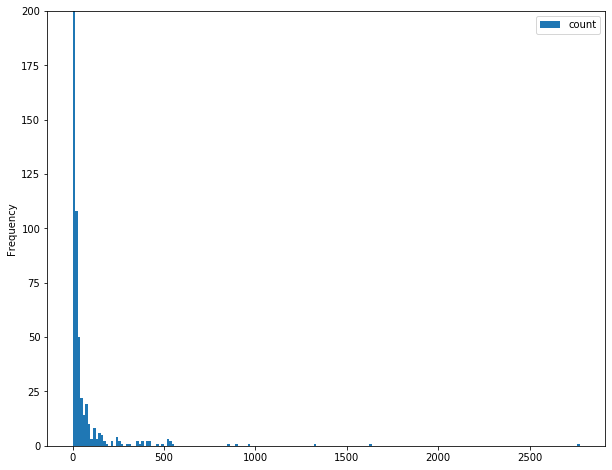

In [159]:
ing_count.plot.hist(y='count', bins=200,ylim=(0,200),figsize=(10,8))

In [161]:
#SAVE ingredient_count_PROD_FINAL
ing_count.to_csv('../O_OPENFF/output_data/ingredient_count_PROD_FINAL.csv')
ing_count.to_excel('../O_OPENFF/output_data/ingredient_count_PROD_FINAL.xlsx')

In [162]:
ing.head()

,O_EAN13,id_ingredient,has_sub_ingredients,sub_ingredients,text,percent_min,percent_max,percent,rank,product_name_fr,unknown_ingredient,id_language,id_ing_sub_ing,sub_ing_dict,sub_ingredients_id,sub_ingredients_fr,sub_ingredients_text,ing_id_sub_ing_id
0,10127780,fr:coulis-de-tomates,NaN,NaN,Coulis de Tomate,78.900,78.900,78.9,1.0,sauce tomate et aubergines grillées,1,fr,NaN,,,,,fr:coulis-de-tomates
1,10127780,en:aubergine,NaN,NaN,aubergines,9.700,9.700,9.7,2.0,sauce tomate et aubergines grillées,0,en,NaN,,,,,en:aubergine
2,10127780,en:extra-virgin-olive-oil,NaN,NaN,huile extra-vierge d'olive,3.900,3.900,3.9,3.0,sauce tomate et aubergines grillées,0,en,NaN,,,,,en:extra-virgin-olive-oil
3,10127780,en:onion,NaN,NaN,oignons,1.875,3.900,NaN,4.0,sauce tomate et aubergines grillées,0,en,NaN,,,,,en:onion
4,10127780,en:carrot,NaN,NaN,carottes,1.200,3.175,NaN,5.0,sauce tomate et aubergines grillées,0,en,NaN,,,,,en:carrot


In [163]:

##########################################
# 2.2) MOST FREQUENT INGREDIENTS (column :en + local language :fr)

ing_count_en_fr=ing[['id_ingredient','text','O_EAN13']].groupby(by=['id_ingredient','text']).count().sort_values('O_EAN13', ascending=False)
ing_count_en_fr.reset_index(inplace=True)
print('number of different ingredients:', ing_count_en_fr.shape[0])
ing_count_en_fr.head(50)

number of different ingredients: 7822


,id_ingredient,text,O_EAN13
0,en:salt,sel,2568
1,en:water,eau,1356
2,en:sugar,sucre,1185
3,en:garlic,ail,769
4,en:sunflower-oil,huile de tournesol,755
5,en:pepper,poivre,496
6,en:onion,oignons,493
7,en:acid,acidifiant,444
8,en:e330,acide citrique,431
9,en:onion,oignon,391


In [165]:
#SAVE ing_count_en_fr
ing_count_en_fr.to_csv('../O_OPENFF/output_data/ing_count_en_fr.csv')
ing_count_en_fr.to_excel('../O_OPENFF/output_data/ing_count_en_fr.xlsx')

In [166]:
#MOST FREQUENT INGREDIENTS (IN ENGLISH)
#NUMBER OF PRODUCTS 1100 in prod /2500 i ing
ing_EN_count=ing_EN[['id_ingredient','O_EAN13']].groupby(['id_ingredient']).count().sort_values('O_EAN13', ascending=False)
print('number of different ingredients:', ing_EN_count.shape[0])
ing_EN_count.head(50)

number of different ingredients: 1231


,O_EAN13
id_ingredient,
en:salt,2776
en:water,1631
en:sugar,1320
en:onion,968
en:sunflower-oil,897
en:garlic,854
en:acid,553
en:spice,542
en:crushed-tomato,542


In [167]:
#MOST FREQUENT INGREDIENTS (FRENCH)
#NUMBER OF PRODUCTS 1100 in prod /2500 i ing
ing_FR_count=ing_FR[['id_ingredient','O_EAN13']].groupby(['id_ingredient']).count().sort_values('O_EAN13', ascending=False)
print('number of different ingredients:', ing_FR_count.shape[0])
ing_FR_count.head(50)

number of different ingredients: 3863


,O_EAN13
id_ingredient,
fr:puree-de-tomate-mi-reduite,102
fr:moutarde-de-dijon,59
fr:foie-gras-de-canard,39
fr:olives-vertes-denoyautees,36
fr:foie-gras-de-canard-du-sud-ouest,32
fr:foie-de-porc,26
fr:Ingrédients de la préparation déshydratée,26
fr:sariette,23
fr:coulis-de-tomates,23


In [168]:

sample=[1,5,10,20,30,40,50,75,100,150,200,250,300,400,500,600,700,800,900,1000]
print('number of ingredients for the ingredient in position')
for i in sample:
    print(i,':',ing.loc[i,'id_ingredient'])

number of ingredients for the ingredient in position
1 : en:aubergine
5 : en:celery
10 : en:basil
20 : fr:Sellerie"
30 : fr:ar extravergine
40 : en:salt
50 : it:delle Assunzioni di riferimento di un adulto medio
75 : en:sunflower-oil
100 : en:tapioca-starch
150 : en:modified-red-port
200 : fr:carraghénangs
250 : en:e472c
300 : en:yeast-extract
400 : fr:antioxydant ferxoitd
500 : en:acid
600 : fr:préparation légumes
700 : en:spice
800 : en:extra-virgin-olive-oil
900 : en:wheat-flour
1000 : en:textured-wheat-protein


In [169]:

##########################################
# 2) INGREDIENTS WITh TOMAT*
##########################################

In [170]:
df_with_text(ing_count,'id_ingredient','tomat')

,id_ingredient,count
8,en:crushed-tomato,542
10,en:tomato,517
32,en:tomato-pulp,218
50,en:double-concentrated-tomato,128
60,fr:puree-de-tomate-mi-reduite,102
...,...,...
5272,fr:Sauce tomate à la Proven ale Pulpe de tomates,1
5273,fr:Sauce tomate à la viande rôtie IngrédienE P...,1
5274,fr:Sauce tomatesà la Truffe,1
5279,fr:Saure om et au basilic aromatise Nod ingrèd...,1
